In [12]:
import pandas
import numpy
import networkx
from matplotlib import pyplot as plt
import re
import pickle

In [2]:
sheets = pandas.ExcelFile("Data.xlsx")
YEARS = [95,90,85,80,70,65,60,55]

dfs = {}
for any_sheets in YEARS:
    dfs[any_sheets] = pandas.read_excel(sheets,str(any_sheets))
# df95 = pandas.read_excel(sheets,"95")
# df90 = pandas.read_excel(sheets,"90")
# df85 = pandas.read_excel(sheets,"85")
# df80 = pandas.read_excel(sheets,"80")
# df70 = pandas.read_excel(sheets,"70")
# df65 = pandas.read_excel(sheets,"65")
# df60 = pandas.read_excel(sheets,"60")
# df55 = pandas.read_excel(sheets,"55")

In [3]:
dfs[95].head()

,فرودگاه مبدا,فروداگه مقصد,تعداد مسافر
0,ابوموسي,بندرعباس,9368
1,اراک,خليج فارس,3506
2,اراک,مشهد,3531
3,اردبيل,مشهد,16607
4,اردبيل,مهرآبادتهران,97476


## change the columns ...

In [4]:
for all_dfs in dfs.values():
    all_dfs.columns = ["Origin","Destination","passengerNO"]
# df95.columns = ["Origin","Destination","passengerNO"]
# df95.head()
dfs[95].head()

,Origin,Destination,passengerNO
0,ابوموسي,بندرعباس,9368
1,اراک,خليج فارس,3506
2,اراک,مشهد,3531
3,اردبيل,مشهد,16607
4,اردبيل,مهرآبادتهران,97476


## fix the names ...

In [5]:
def fun(city_name):
    if city_name == "ايلام":
        return "ایلام"
    elif city_name == 'اروميه':
        return "ارومیه"
    elif city_name == "بيرجند":
        return "بیرجند"
    elif city_name == "تبريز":
        return "تبریز"
    elif city_name == "ايرانشهر":
        return "ایرانشهر"
    elif city_name == "شيراز":
        return "شیراز"
    else:
        return re.sub(r"\s+","",city_name)

for t in range(2):
    for all_dfs in dfs.values():
        all_dfs['Origin'] = all_dfs.apply(lambda x: fun(x['Origin']),axis=1)
        all_dfs['Destination'] = all_dfs.apply(lambda x: fun(x['Destination']),axis=1)

## get the name of airports ...

In [6]:
airports = []

for all_dfs in dfs.values():
    airports = list(all_dfs["Origin"].unique()) + airports
    airports = list(set(list(all_dfs["Destination"].unique()) + airports))

airports = sorted(airports)
print(airports)

['آبادان', 'آقاجاري', 'آهواز', 'ابوموسي', 'اراک', 'اردبيل', 'ارومیه', 'اصفهان', 'امامخميني', 'اهواز', 'ایرانشهر', 'ایلام', 'بجنورد', 'بم', 'بندرعباس', 'بندرلنگه', 'بهرگان', 'بوشهر', 'بیرجند', 'تبریز', 'توحيد', 'جم', 'جيرفت', 'خارک', 'خرمآباد', 'خليجفارس', 'خوي', 'دزفول', 'رامسر', 'رشت', 'رفسنجان', 'زابل', 'زاهدان', 'زنجان', 'ساري', 'سبزوار', 'سنندج', 'سهند', 'سيرجان', 'سيري', 'شاهرود', 'شهرکرد', 'شیراز', 'طبس', 'عسلويه', 'قشم', 'لار', 'لامرد', 'لاوان', 'ماهشهر', 'مشهد', 'مهرآبادتهران', 'نوشهر', 'همدان', 'ياسوج', 'يزد', 'پارسآباد', 'چابهار', 'کاشان', 'کرمان', 'کرمانشاه', 'کلاله', 'کيش', 'گرگان', 'گچساران', 'یزد']


In [7]:
len(airports)

66

## Translate the name of cities

In [8]:
from googletrans import Translator
translator = Translator()

trans = {}
for persian_cities in airports:
    t = translator.translate(persian_cities, src='persian')
    trans[persian_cities] = t.text

In [9]:
trans

{'آبادان': 'Abadan',
 'آقاجاري': 'AGHAJARI',
 'آهواز': 'Ahvaz',
 'ابوموسي': 'Abu Musa',
 'اراک': 'Arak',
 'اردبيل': 'Ardabil',
 'ارومیه': 'Orumieh',
 'اصفهان': 'Esfahan',
 'امامخميني': 'Imam',
 'اهواز': 'Ahvaz',
 'ایرانشهر': 'Iranshahr',
 'ایلام': 'Elam',
 'بجنورد': 'Bojnoord',
 'بم': 'Bass',
 'بندرعباس': 'Bandar Abbas',
 'بندرلنگه': 'Lengeh seaport',
 'بهرگان': 'Bahregan',
 'بوشهر': 'Bushehr',
 'بیرجند': 'Birjand',
 'تبریز': 'Tabriz',
 'توحيد': 'Unity',
 'جم': 'Jam',
 'جيرفت': 'Jiroft',
 'خارک': 'Kharg',
 'خرمآباد': 'Khorramabad',
 'خليجفارس': 'Persian Gulf',
 'خوي': 'Khoy',
 'دزفول': 'Dezful',
 'رامسر': 'Ramsar',
 'رشت': 'Rasht',
 'رفسنجان': 'Rafsanjan',
 'زابل': 'Zabul',
 'زاهدان': 'Zahedan',
 'زنجان': 'Zanjan',
 'ساري': 'Sari',
 'سبزوار': 'Sabzevar',
 'سنندج': 'Sanandaj',
 'سهند': 'Sahand',
 'سيرجان': 'Sirjan',
 'سيري': 'Browse',
 'شاهرود': 'Anymore',
 'شهرکرد': 'Shahr e Kord',
 'شیراز': 'Shiraz',
 'طبس': 'Peaks',
 'عسلويه': 'Assaluyeh',
 'قشم': 'Qeshm',
 'لار': 'Lar',
 'لامرد': 'L

## Replace the persian names with english ones

In [10]:
def fun1(persian_name):
    return trans[persian_name]

for all_dfs in dfs.values():
    all_dfs['Origin'] = all_dfs.apply(lambda x: fun1(x['Origin']),axis=1)
    all_dfs['Destination'] = all_dfs.apply(lambda x: fun1(x['Destination']),axis=1)

dfs[95].head()

,Origin,Destination,passengerNO
0,Abu Musa,Bandar Abbas,9368
1,Arak,Persian Gulf,3506
2,Arak,Mashhad,3531
3,Ardabil,Mashhad,16607
4,Ardabil,Mhrabadthran,97476


In [11]:
nets = {}

for year in YEARS:
    temp_net = networkx.Graph()
    temp_df = dfs[year]
    for i in range(len(temp_df)):
        temp_net.add_edge(temp_df["Origin"].iloc[i],temp_df["Destination"].iloc[i])
    nets[year] = temp_net

c:\users\esysss\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


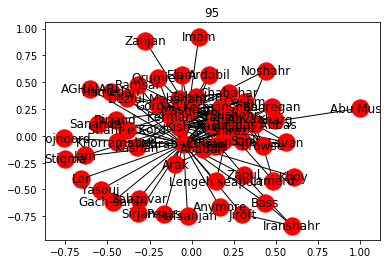

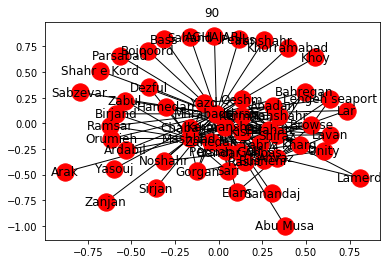

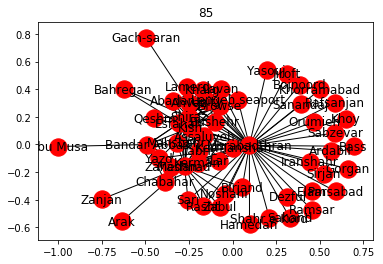

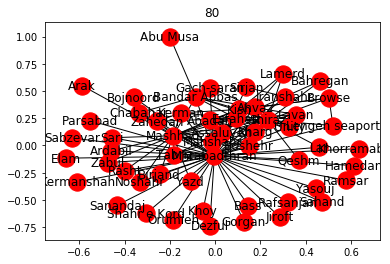

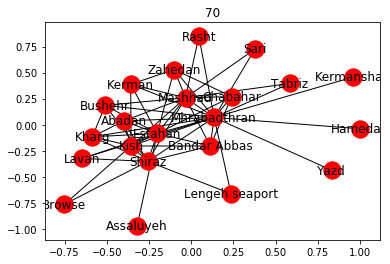

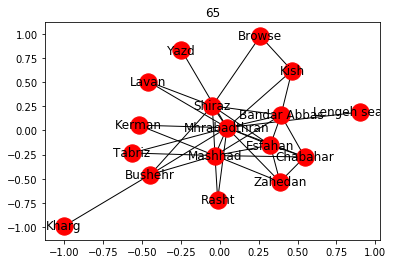

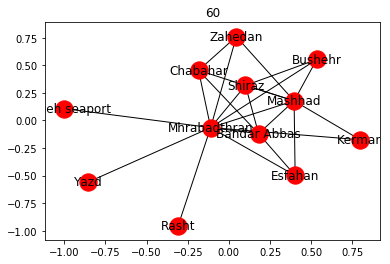

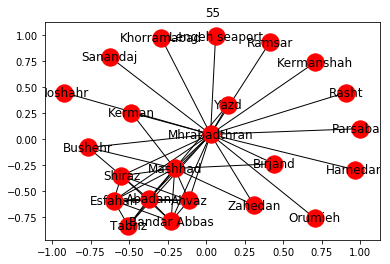

In [13]:
for net,year in zip(nets.values(),YEARS):
    networkx.draw_networkx(net)
    plt.title(year)
    plt.show()

In [15]:
pickle_out = open("nets.p","wb")
pickle.dump(nets, pickle_out)
pickle_out.close()